<a href="https://colab.research.google.com/github/APstats-labs/labs/blob/main/SA_C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data pre-processing methods (1)

General requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Mounted at /content/drive


##Sampling tehniques

### Preparing the data

Loading a STATA dataset from Google Drive

In [2]:
data = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/Statistics/Curs/Data_c2/ZA8761_v1-0-0.dta')

Listing variable names in a table

In [3]:
variable_names = data.columns.tolist()

# Calculate the number of rows and columns for the tabular form
num_variables = len(variable_names)
num_columns = (num_variables + 19) // 20  # Round up to nearest multiple of 20

# Create a DataFrame to store the variable names in the desired format
names_df = pd.DataFrame(columns=[f'Column_{i+1}' for i in range(num_columns)])

# Fill in the DataFrame with variable names
for i, var_name in enumerate(variable_names):
    col_idx = i // 20
    names_df.loc[i % 20, f'Column_{col_idx+1}'] = var_name

# Display the DataFrame
names_df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13
0,studyno,d3_7,d3_28,q4_2,q5_11,q7_11,q13_1,q15_13,dx1,d12bg,d12nl,euronz20,w103
1,doi,d3_8,d3_29,q4_3,q6_1,q7_12,q13_2,q16_1,d4,d12cy,d12nl_r,eu_nms10,w100
2,version,d3_9,d3_30,q4_4,q6_2,q8_1,q13_3,q16_2,d4r1,d12cz,d12pl,eu_nms12,NaN
3,edition,d3_10,d3c,q4_5,q6_3,q8_2,q13_4,q16_3,d4r2,d12dk,d12pl_r,eu_nms13,NaN
4,survey,d3_11,d13,q4_6,q6_4,q8_3,q13_5,q16_4,d5a,d12ee,d12pt,eu25,NaN
5,uniqid,d3_12,q1,q4_7,q6_5,q9,q13_6,q16_5,d5b,d12de,d12ro,eu27,NaN
6,serialid,d3_13,q2,q4_8,q6_6,q10_1,consent,q16_6,d5c,d12gr,d12se,eu_la6,NaN
7,ipscntry,d3_14,q3_1,q4_9,q6_7,q10_2,q14,q16_7,d5d,d12gr_r,d12se_r,w1,NaN
8,country,d3_16,q3_2,q4_10,q6_8,q10_3,q15_1,q16_8,d5e,d12es,d12si,w5,NaN
9,isocntry,d3_17,q3_3,q4_11,q6_9,q10_4,q15_2,q16_9,d5r,d12es_r,d12si_r,w6,NaN


Select a subset of the data and rename the columns.

This subset will serve as our population for sampling

In [4]:
MentalProblems = data[['q1','q14', 'd5c']]
MentalProblems = MentalProblems.set_axis([ 'Feeling Last 4 weeks', 'Anxiety or Depression last 12 months', 'Ocupation'], axis=1)
MentalProblems = MentalProblems.iloc[2100:2110]
MentalProblems.insert(0, 'ID', MentalProblems.reset_index().index + 1)
MentalProblems

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2100,1,I felt tired/worn out,Yes,Civil servant
2101,2,I felt calm and peaceful,No,Civil servant
2102,3,I felt calm and peaceful,No,NaN
2103,4,I felt tense,Yes,Office clerk
2104,5,I felt full of energy,No,Office clerk
2105,6,I felt tense,Yes,NaN
2106,7,I felt tense,Yes,Office clerk
2107,8,I felt calm and peaceful,Yes,NaN
2108,9,I felt calm and peaceful,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk


### Sampling

**Sampling with replacement**

Notice that the same individual **can** be included multiple times in the sample.

In [5]:
WihtReplacement=MentalProblems.sample(n=5, replace=True, random_state=3)
WihtReplacement

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2108,9,I felt calm and peaceful,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk
2103,4,I felt tense,Yes,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk


**Sampling without replacement**

Note that the same individual **cannot** be included multiple times in the sample.

However, the sample consists only of Office Clerks (with one NAN value).

In [6]:
WithoutReplacement=MentalProblems.sample(n=5, replace=False, random_state=4)
WithoutReplacement

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2103,4,I felt tense,Yes,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk
2104,5,I felt full of energy,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk
2102,3,I felt calm and peaceful,No,NaN


**Stratified sampling**

First, NAN is categorized as a separate category.

In [7]:
categorical_columns = MentalProblems.select_dtypes(include=['category']).columns

for col in categorical_columns:
    # Add 'NaN' as a new category and assign it back to the original DataFrame
    MentalProblems[col] = MentalProblems[col].cat.add_categories(['NaN'])

    # Fill NaN values with the string 'NaN' and assign back to the column
    MentalProblems[col] = MentalProblems[col].fillna('NaN')


Next, we perform stratified sampling.

Note that instead of specifying a sample size, we indicate the percentage of each stratum to be included in the sample

In [8]:
# Perform stratified sampling
Stratified = MentalProblems.groupby('Ocupation', group_keys=False, observed=False).apply(lambda x: x.sample(frac=0.5),include_groups=False)
Stratified

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months
2101,2,I felt calm and peaceful,No
2108,9,I felt calm and peaceful,No
2109,10,I felt calm and peaceful,Yes
2102,3,I felt calm and peaceful,No
2105,6,I felt tense,Yes


## Missing data handling

### Preparing data

Import an Excel file from Drive.



In [9]:
data_homa = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Statistics/Curs/Data_c2/homa.xlsx')

Visualize the amount of missing data.

<Axes: >

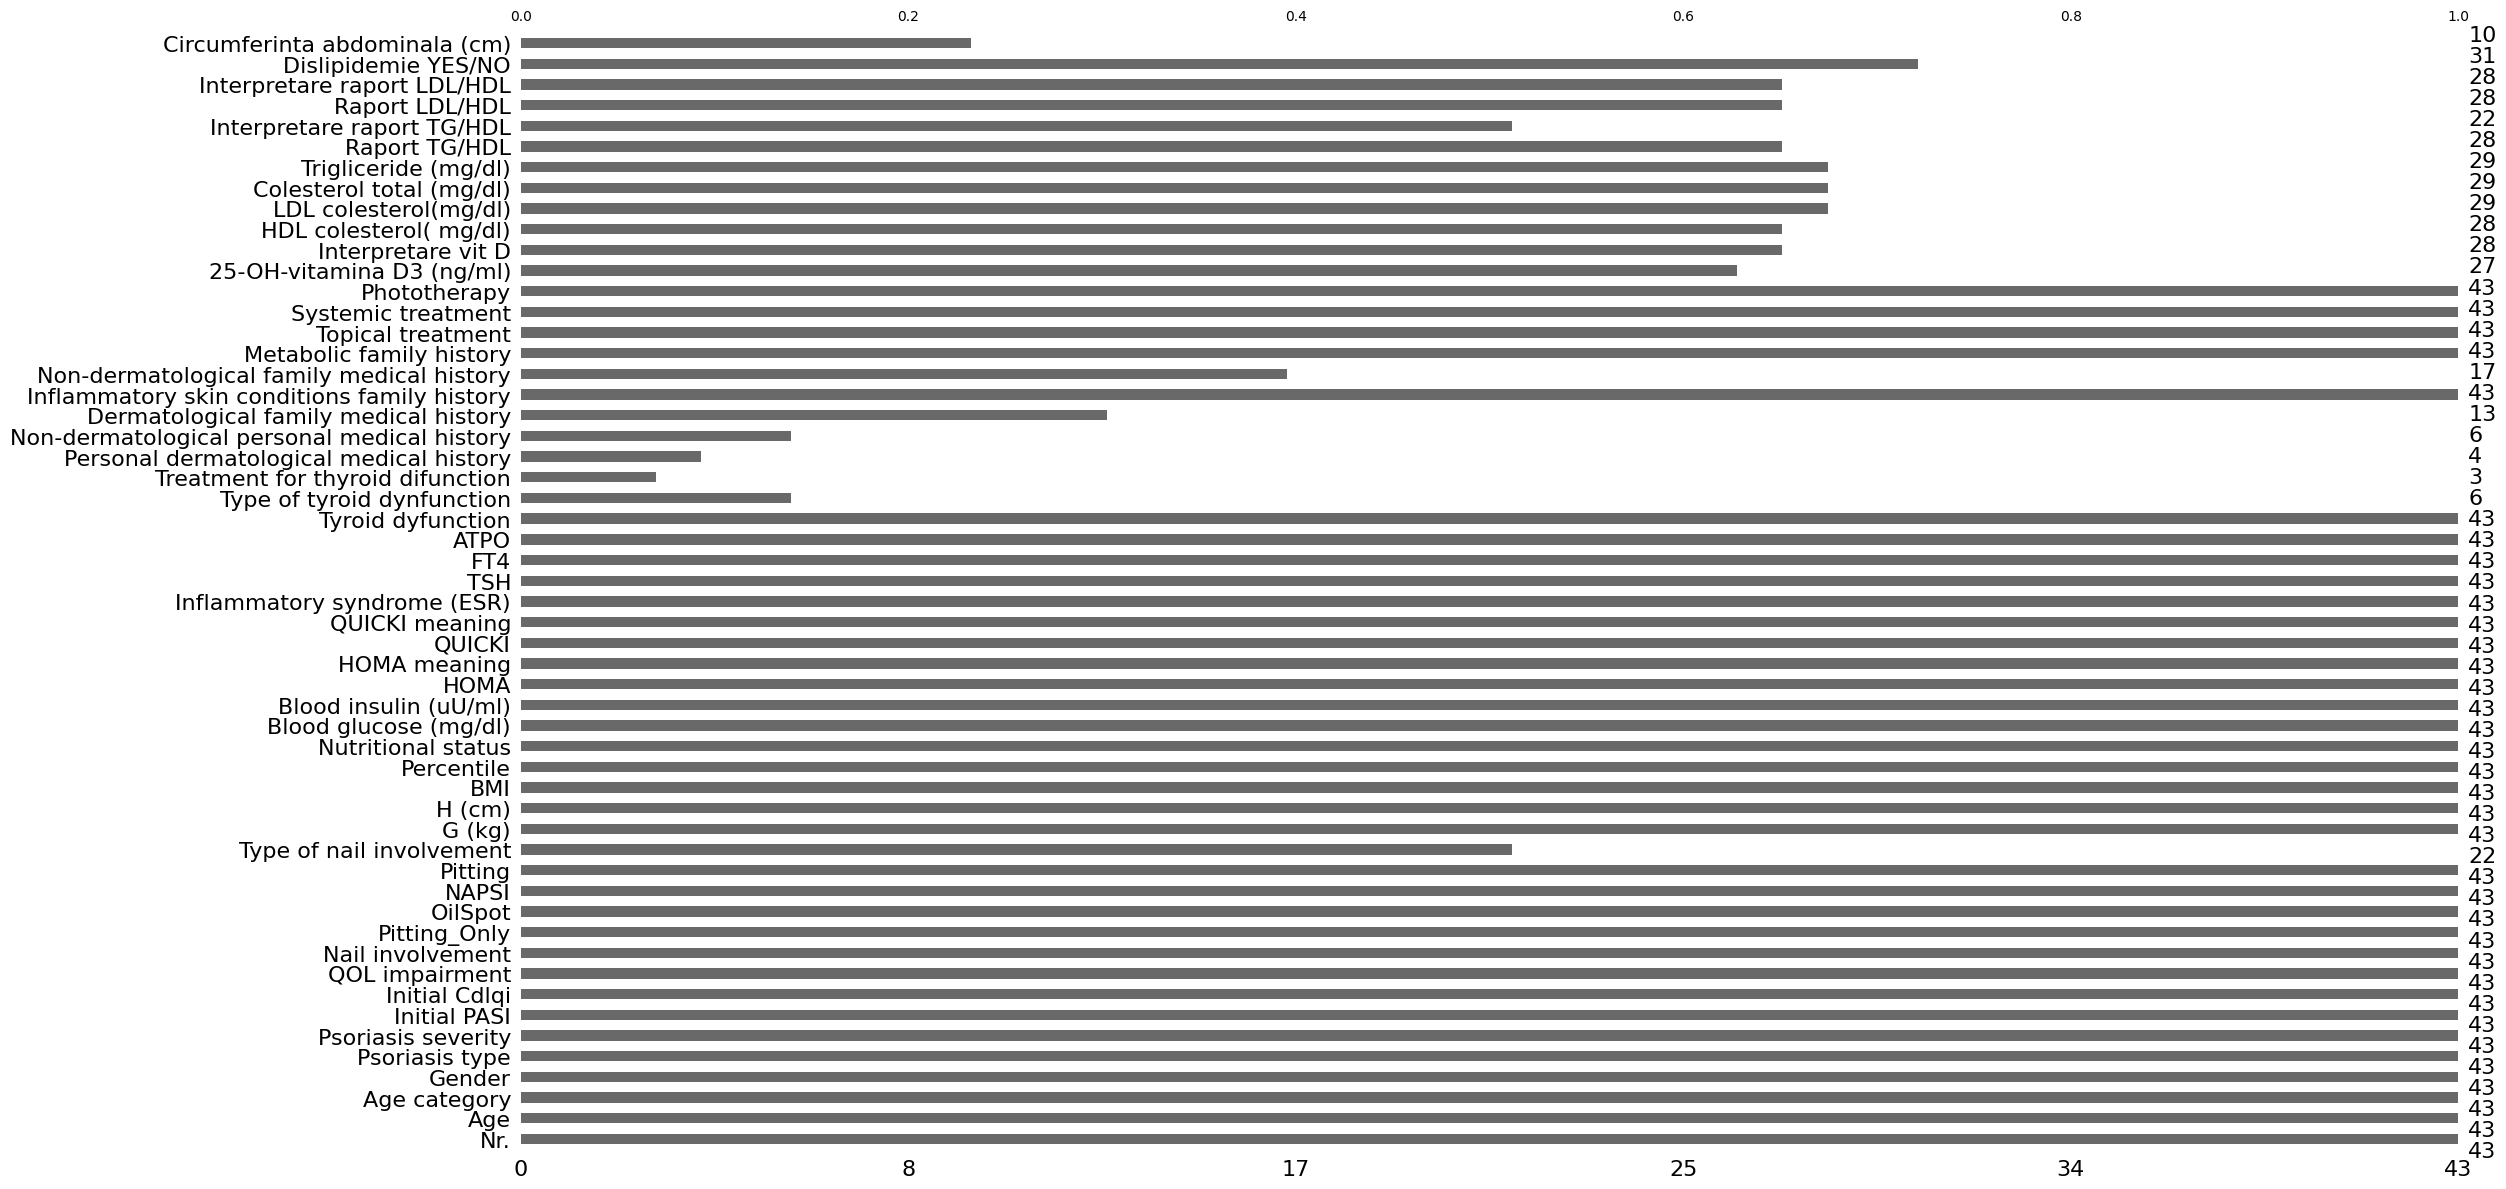

In [10]:
import missingno as msno
msno.bar(data_homa)
#msno.heatmap(data_homa)

❗ Always take a look at the data! For example, note this error in data entry.

In [11]:
data_homa.loc[35:37, 'ATPO']

,ATPO
35,N
36,↑ X 32
37,N


### Missing data treatment procedures

#### Listwise treatment/Complete-cases

Drop rows with missing data in the variable of interest.

In [12]:
data_homa_listwise = data_homa.dropna(subset=['Raport TG/HDL'],how='any')

Notice that the dataset was reduced from 43 to 28 rows

In [13]:
print(f"Initial dataset size: {len(data_homa)}, Dataset size with listwise: {len(data_homa_listwise)}")

Initial dataset size: 43, Dataset size with listwise: 28


####Pairwise**/**Avalabile cases

Pandas uses pairwise deletion by default.

Observe the differences below and note how the mean changes compared to listwise deletion

The mean of the variable of interest remains the same because all the available information for this variable is used in both pairwise and listwise deletion

In [14]:
print(f"Mean of variable with missing (pairwise): {data_homa['Raport TG/HDL'].mean()}, Mean of variable with missing (listwise): {data_homa_listwise['Raport TG/HDL'].mean()}")

Mean of variable with missing (pairwise): 2.0396428571428573, Mean of variable with missing (listwise): 2.0396428571428573


However, the means of the other variables may differ.

For example, Age has 43 data points, all of which were used to compute the mean via the pairwise method. In contrast, listwise deletion used only 23 cases that had data on 'Raport TG/HDL.'"

In [15]:
print(f"Mean of another variable with no missing (pairwise): {data_homa['Age'].mean()}, Mean of another variable with no missing (listwise): {data_homa_listwise['Age'].mean()}")

Mean of another variable with no missing (pairwise): 12.023255813953488, Mean of another variable with no missing (listwise): 11.928571428571429


####Mean/Mode/Median imputation

The SimpleImputer is used to replace missing values with the mean of the respective variable. This method is applied to all quantiative variables.

In [16]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean') ### "most_frequent" - mode - or "median" can also be used

In [17]:
data_homa_mean = data_homa.copy()

for col in data_homa_mean.select_dtypes(include=['number']).columns:
    data_homa_mean[col] = mean_imputer.fit_transform(data_homa[[col]]) ##this is required as mean only works for numeric

Note that the mean of the variable of interest remained the same; however, the variance changed.

In [18]:
print(f"Mean of variable with missing (pairwise): {data_homa['Raport TG/HDL'].mean()}, Mean variable with missing (Mean Imputation): {data_homa_mean['Raport TG/HDL'].mean()}")

Mean of variable with missing (pairwise): 2.0396428571428573, Mean variable with missing (Mean Imputation): 2.039642857142857


In [19]:
print(f"Variance of variable with missing (pairwise): {data_homa['Raport TG/HDL'].var()}, Variance variable with missing (Mean Imputation): {data_homa_mean['Raport TG/HDL'].var()}")

Variance of variable with missing (pairwise): 2.9818406084656095, Variance variable with missing (Mean Imputation): 1.916897534013606


❗ Using the mode or median also changes the mean

#### Indicator

In this approach, we use the Simple Imputer to replace missing data with the most frequent value (mode) and set add_indicator=True to create an indicator variable for each feature.

In [20]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent',add_indicator=True)

In [21]:
data_homa_mode_indicator = pd.DataFrame(mode_imputer.fit_transform(data_homa),
                                        columns = mode_imputer.get_feature_names_out())

Notice how an indicator was created for each column with NAN

In [22]:
data_homa.shape

(43, 54)

In [23]:
data_homa_mode_indicator.shape

(43, 73)

In [24]:
pd.set_option('display.max_columns', None)
data_homa_mode_indicator[3:5] ###look towards the end of the table

,Nr.,Age,Age category,Gender,Psoriasis type,Psoriasis severity,Initial PASI,Initial Cdlqi,QOL impairment,Nail involvement,Pitting_Only,OilSpot,NAPSI,Pitting,Type of nail involvement,G (kg),H (cm),BMI,Percentile,Nutritional status,Blood glucose (mg/dl),Blood insulin (uU/ml),HOMA,HOMA meaning,QUICKI,QUICKI meaning,Inflammatory syndrome (ESR),TSH,FT4,ATPO,Tyroid dyfunction,Type of tyroid dynfunction,Treatment for thyroid difunction,Personal dermatological medical history,Non-dermatological personal medical history,Dermatological family medical history,Inflammatory skin conditions family history,Non-dermatological family medical history,Metabolic family history,Topical treatment,Systemic treatment,Phototherapy,25-OH-vitamina D3 (ng/ml),Interpretare vit D,HDL colesterol( mg/dl),LDL colesterol(mg/dl),Colesterol total (mg/dl),Trigliceride (mg/dl),Raport TG/HDL,Interpretare raport TG/HDL,Raport LDL/HDL,Interpretare raport LDL/HDL,Dislipidemie YES/NO,Circumferinta abdominala (cm),missingindicator_Type of nail involvement,missingindicator_Type of tyroid dynfunction,missingindicator_Treatment for thyroid difunction,missingindicator_Personal dermatological medical history,missingindicator_Non-dermatological personal medical history,missingindicator_Dermatological family medical history,missingindicator_Non-dermatological family medical history,missingindicator_25-OH-vitamina D3 (ng/ml),missingindicator_Interpretare vit D,missingindicator_HDL colesterol( mg/dl),missingindicator_LDL colesterol(mg/dl),missingindicator_Colesterol total (mg/dl),missingindicator_Trigliceride (mg/dl),missingindicator_Raport TG/HDL,missingindicator_Interpretare raport TG/HDL,missingindicator_Raport LDL/HDL,missingindicator_Interpretare raport LDL/HDL,missingindicator_Dislipidemie YES/NO,missingindicator_Circumferinta abdominala (cm)
3,4,6,Middle childhood,M,Vulgaris,Mild,3.8,4,Small effect,YES,1,0,18,1,Pitting,29.5,143,14.4,20,Normal weight,87.9,4.03,0.9,Normal,0.3923,Normal,NO,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Achantosis nigricans,Allergic rhinitis,Paternal grandmother - psoriasis,YES,Maternal grandmother - thyroid disfunction,NO,YES,NO,NO,28.9,Insuficient,63.8,70.7,125.8,23.9,0.37,Optim,1.1,N,NO,90.0,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,10,Middle childhood,F,Inverse,Mild,1.8,5,Small effect,YES,0,1,25,1,"Pitting, oil spot",73.0,156,30.0,99,Obese,76.1,20.69,3.9,Elevated,0.3128,Low,YES,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Achantosis nigricans,Allergic rhinitis,Father - psoriasis,NO,Maternal grandmother - thyroid disfunction,NO,YES,NO,NO,32.9,Normal,44.1,97.0,150.3,114.5,2.5,Elevated,2.1,N,YES,90.0,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True


####Regression imputation (for quantiative data only)

Regression involves building a prediction model for each variable using the other variables. In this approach, only numeric data are considered.

In [25]:
#Create two DataFrames, one for each data type (categorical/quantiative)

categorical_columns = []
numeric_columns = []
for c in data_homa.columns:
    if data_homa[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

data_homa_numeric = data_homa[numeric_columns]
data_homa_categorical = pd.DataFrame(data_homa[categorical_columns])

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
regression_imputer = IterativeImputer() ##Uses bayesian Ridge

In [27]:
data_homa_regress = pd.DataFrame(regression_imputer.fit_transform(data_homa_numeric),
                                        columns = regression_imputer.get_feature_names_out())

In [28]:
#Concatenate the quantiative data with no NAN with the categorical data

data_homa_regress_final = pd.concat([data_homa_regress, data_homa_categorical], axis = 1)

Note that this also decreases variance; however, it does so to a lesser extent than mean imputation.

In [29]:
data_homa['Raport TG/HDL'].var()

2.9818406084656095

In [30]:
data_homa_mean['Raport TG/HDL'].var()

1.916897534013606

In [31]:
data_homa_regress_final['Raport TG/HDL'].var()

1.9524421276841086

However, this strengthens correlation when compared with mean imputation




In [32]:
np.corrcoef(data_homa_mean['Raport TG/HDL'], data_homa_mean['BMI'])

array([[1.       , 0.2165857],
       [0.2165857, 1.       ]])

In [33]:
np.corrcoef(data_homa_regress_final['Raport TG/HDL'], data_homa_regress_final['BMI'])

array([[1.        , 0.24990442],
       [0.24990442, 1.        ]])

#### Logistic Regression imputation

In this scenario, we assume that the missing data for 'Type of thyroid dysfunction' falls into the category of 'known unknowns' (although this is not the case, as it is actually an 'unknown unknown')

First, the data needs to be encoded.

Optional: Check the differences between OneHotEncoder and OrdinalEncoder. Also, consider exploring Label Encoder, which paves the way for the concept of 'embeddings' used in AI/ML/DL. Additionally, read about cyclical feature encoding here: https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [35]:
# Select the column to encode
column_to_encode = 'Type of tyroid dynfunction'

not_null_mask = data_homa[column_to_encode].notnull()
data_homa.loc[not_null_mask, 'Encoded_' + column_to_encode] = label_encoder.fit_transform(data_homa.loc[not_null_mask, column_to_encode])
data_homa['Encoded_' + column_to_encode] = data_homa['Encoded_' + column_to_encode].astype('Int64')  # Preserve NaNs as Int64 type


print(data_homa[["Encoded_Type of tyroid dynfunction","Type of tyroid dynfunction"]].head(10))


   Encoded_Type of tyroid dynfunction        Type of tyroid dynfunction
0                                <NA>                               NaN
1                                <NA>                               NaN
2                                <NA>                               NaN
3                                <NA>                               NaN
4                                <NA>                               NaN
5                                <NA>                               NaN
6                                <NA>                               NaN
7                                   1  Euthyroid autoimmune thyroiditis
8                                <NA>                               NaN
9                                <NA>                               NaN


Impute the data using 'autoimpute.

To my knowledge, scikit-learn does not support logistic regression.

❗Autoimpute seems versatile for all types of missing data imputation

In [ ]:
!pip install autoimpute

In [37]:
from autoimpute.imputations import SingleImputer

# Define predictor columns
predictor_cols = ["BMI", "NAPSI", "Age", "Initial Cdlqi"]


Logistic_Regression_imputer = SingleImputer(strategy={"Encoded_Type of tyroid dynfunction": "multinomial logistic"}, predictors={"Encoded_Type of tyroid dynfunction": predictor_cols})

Warnings are probably due to:
1. The way autoimputer calls the scikit-learn Logistic regression
2. Optimization problems (Worth checking why)

In [40]:
data_homa_LR = Logistic_Regression_imputer.fit_transform(data_homa)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
data_homa_LR['Decoded_Type of tyroid dynfunction'] = label_encoder.inverse_transform(data_homa_LR["Encoded_Type of tyroid dynfunction"].dropna().astype(int)) #This is to bring back the labels
print(data_homa_LR[["Encoded_Type of tyroid dynfunction","Decoded_Type of tyroid dynfunction"]].head(10))

   Encoded_Type of tyroid dynfunction Decoded_Type of tyroid dynfunction
0                                   2                    Hypothrroidism 
1                                   3  Primary autoimmune hypothyroidism
2                                   2                    Hypothrroidism 
3                                   1   Euthyroid autoimmune thyroiditis
4                                   1   Euthyroid autoimmune thyroiditis
5                                   2                    Hypothrroidism 
6                                   2                    Hypothrroidism 
7                                   1   Euthyroid autoimmune thyroiditis
8                                   3  Primary autoimmune hypothyroidism
9                                   1   Euthyroid autoimmune thyroiditis


####Stohastic Regression imputation (numeric data only)

In this approach, I used a workaround by sampling from the posterior of a Bayesian regression.

In contrast, non-Bayesian stochastic regression takes a different approach focused on residuals. The Autoimpute package may provide that functionality.

In [44]:
#Create two DataFrames, one for each data type (categorical/quantiative)

categorical_columns = []
numeric_columns = []
for c in data_homa.columns:
    if data_homa[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_homa_numeric = data_homa[numeric_columns]
data_homa_categorical = pd.DataFrame(data_homa[categorical_columns])

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
regression_imputer_stohastic = IterativeImputer(sample_posterior=True, min_value = 0.5,max_value = 3.9, random_state=14) ##Uses bayesian Ridge, samping from the posterior gives us the noise. A min and max were used to avoid implausable results

In [45]:
data_homa_regress_stohastic = pd.DataFrame(regression_imputer_stohastic.fit_transform(data_homa_numeric),
                                        columns = regression_imputer_stohastic.get_feature_names_out())

data_homa_regress_final_stohastic = pd.concat([data_homa_regress_stohastic, data_homa_categorical], axis = 1)

Note that the variance is closest to the variance obtained from pairwise and listwise deletion.

In [50]:
data_homa['Raport TG/HDL'].var()

2.9818406084656095

In [48]:
data_homa_regress_final['Raport TG/HDL'].var()

1.9524421276841086

In [49]:
data_homa_regress_final_stohastic['Raport TG/HDL'].var()

2.4627265985282745

Note that the correlations are smallest when compared to regression imputation, although the difference is minimal in this case.

In [54]:
np.corrcoef(data_homa_regress_final['Raport TG/HDL'], data_homa_regress_final['BMI'])

array([[1.        , 0.24990442],
       [0.24990442, 1.        ]])

In [53]:
np.corrcoef(data_homa_regress_final_stohastic['Raport TG/HDL'], data_homa_regress_final_stohastic['BMI'])

array([[1.        , 0.24075393],
       [0.24075393, 1.        ]])